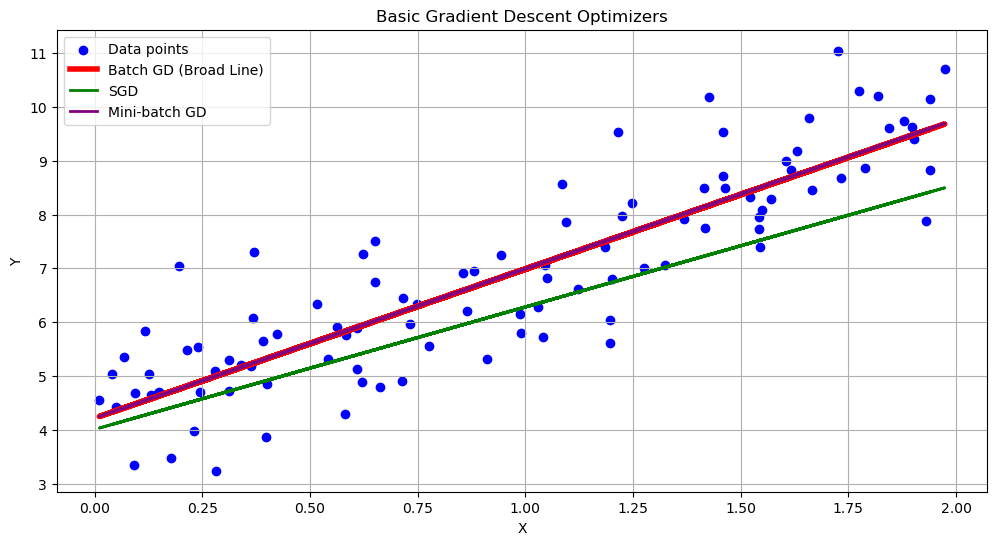

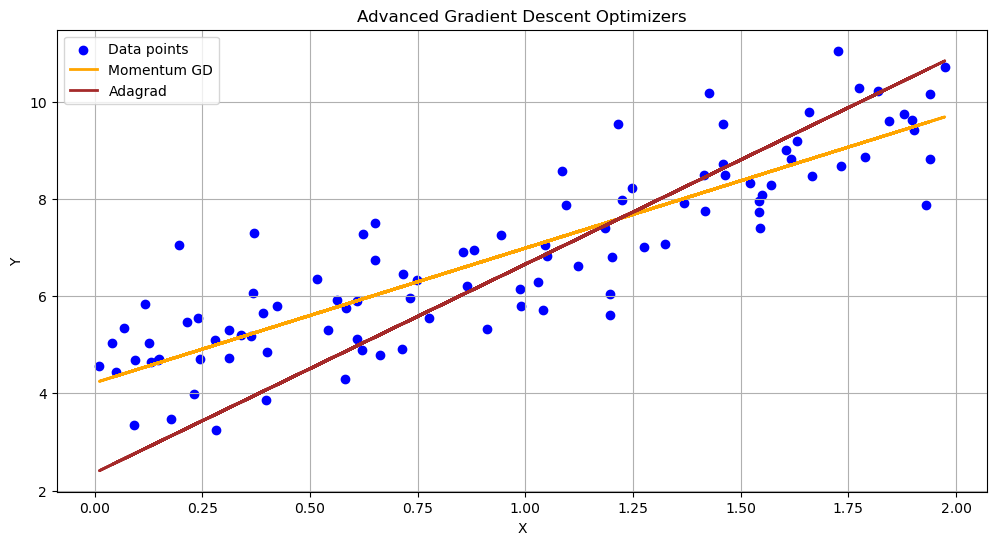

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

# Add bias term (intercept)
X_b = np.c_[np.ones((100, 1)), x]

# Function to compute cost
def compute_cost(X, y, theta):
    m = len(y)
    return (1/m) * np.sum((X.dot(theta) - y) ** 2)

# Batch Gradient Descent with cost tracking
def batch_gradient_descent(X, y, learning_rate=0.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(2, 1)  # Random initialization
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, learning_rate=0.1, n_epochs=50):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Mini-batch Gradient Descent with cost tracking
def mini_batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=50, batch_size=20):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    for iteration in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_b_shuffled[i:i + batch_size]
            yi = y_shuffled[i:i + batch_size]
            gradients = 2/len(xi) * xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients
    return theta

# Momentum-based Gradient Descent
def gradient_descent_momentum(X, y, learning_rate=0.01, iterations=1000, gamma=0.9):
    m = len(y)
    theta = np.zeros((X.shape[1], 1))  # Zero initialization
    velocity = np.zeros_like(theta)
    for i in range(iterations):
        gradients = 1/m * X.T.dot(X.dot(theta) - y)
        velocity = gamma * velocity - learning_rate * gradients
        theta += velocity
    return theta

# Adagrad
def adagrad(X, y, learning_rate=0.1, epsilon=1e-8, iterations=1000):
    m = len(y)
    theta = np.random.randn(2, 1)  # Random initialization
    gradient_accum = np.zeros_like(theta)
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        gradient_accum += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(gradient_accum) + epsilon)
        theta -= learning_rate * adjusted_gradients
    return theta

# Calculate thetas for basic optimizers
theta_bgd = batch_gradient_descent(X_b, y)
theta_sgd = stochastic_gradient_descent(X_b, y)
theta_mbgd = mini_batch_gradient_descent(X_b, y)

# Calculate thetas for advanced optimizers
theta_momentum = gradient_descent_momentum(X_b, y)
theta_adagrad = adagrad(X_b, y)

# Plotting for Basic Optimizers
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, X_b.dot(theta_bgd), color='red', linewidth=4, label='Batch GD (Broad Line)')  # Broader line for BGD
plt.plot(x, X_b.dot(theta_sgd), color='green', linewidth=2, label='SGD')
plt.plot(x, X_b.dot(theta_mbgd), color='purple', linewidth=2, label='Mini-batch GD')

# Labels and legend for basic optimizers
plt.title('Basic Gradient Descent Optimizers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

# Plotting for Advanced Optimizers
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, X_b.dot(theta_momentum), color='orange', linewidth=2, label='Momentum GD')
plt.plot(x, X_b.dot(theta_adagrad), color='brown', linewidth=2, label='Adagrad')

# Labels and legend for advanced optimizers
plt.title('Advanced Gradient Descent Optimizers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()
